# Pokemon Analysis
Project of analyzing statistically significant or interesting subjects with the Pokemon dataset obtained from Kaggle at https://www.kaggle.com/mrdew25/pokemon-database

## Imports

In [151]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

## Reading Database into Dataframe
Here I read the database into a Pandas Dataframe object and do some cleanup in preparation for analysis.

_Note: 1,064 Pokemon data_

In [169]:
df_pokemon = pd.read_csv('data\Pokemon Database.csv', encoding = "ISO-8859-1")
# df_pokemon.set_index('Pokemon Id', inplace=True)
df_pokemon

,Pokemon Id,Pokedex Number,Pokemon Name,Classification,Alternate Form Name,Original Pokemon ID,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type,...,EV Yield Total,Catch Rate,Experience Growth,Experience Growth Total,Experience Yield,Primary Egg Group,Secondary Egg Group,Egg Cycle Count,Pre-Evolution Pokemon Id,Evolution Details
0,1,1,Bulbasaur,Seed Pokemon,NaN,NaN,NaN,0.7,6.9,Grass,...,1,45,Medium Slow,1059860,64,Monster,Grass,20,NaN,NaN
1,2,2,Ivysaur,Seed Pokemon,NaN,NaN,NaN,1.0,13.0,Grass,...,2,45,Medium Slow,1059860,142,Monster,Grass,20,1.0,Level 16
2,3,3,Venusaur,Seed Pokemon,NaN,NaN,NaN,2.0,100.0,Grass,...,3,45,Medium Slow,1059860,236,Monster,Grass,20,2.0,Level 32
3,4,3,Venusaur,Seed Pokemon,Mega,3.0,NaN,2.4,155.5,Grass,...,3,45,Medium Slow,1059860,281,Monster,Grass,20,NaN,NaN
4,5,4,Charmander,Lizard Pokemon,NaN,NaN,NaN,0.6,8.5,Fire,...,1,45,Medium Slow,1059860,62,Monster,Dragon,20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1595,25,Pikachu,Mouse Pokemon,Starter,89.0,NaN,0.4,6.0,Electric,...,2,190,Medium Fast,1000000,112,Field,Fairy,10,NaN,NaN
1060,1596,133,Eevee,Evolution Pokemon,Starter,228.0,NaN,0.3,6.5,Normal,...,1,45,Medium Fast,1000000,65,Field,NaN,35,NaN,NaN
1061,1597,893,Zarude,Rogue Monkey Pokemon,NaN,NaN,NaN,1.8,70.0,Dark,...,3,3,Slow,1250000,274,Undiscovered,NaN,120,NaN,NaN
1062,1600,892,Urshifu,Wushu Pokemon,Gigantamax,39.0,NaN,29.0,0.0,Fighting,...,3,3,Erratic,600000,257,Undiscovered,NaN,5,NaN,NaN


I chose the following columns for their potential relevance.

In [154]:
choiceColumns_i = [1,2,3,6,7,8,9,10,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40,41]
n_col = df_pokemon.columns[choiceColumns_i]
df_pokemon = df_pokemon[n_col]
df_pokemon.columns

Index(['Pokedex Number', 'Pokemon Name', 'Classification', 'Legendary Type',
       'Pokemon Height', 'Pokemon Weight', 'Primary Type', 'Secondary Type',
       'Health Stat', 'Attack Stat', 'Defense Stat', 'Special Attack Stat',
       'Special Defense Stat', 'Speed Stat', 'Base Stat Total', 'Health EV',
       'Attack EV', 'Defense EV', 'Special Attack EV', 'Special Defense EV',
       'Speed EV', 'EV Yield Total', 'Experience Growth Total',
       'Experience Yield'],
      dtype='object')

## Data Preparation and Cleanup
I make a dictionary of the types of each column and replace `NaN` or empty values with `-1` of the respective column type.

In [155]:
c_type = {c:type(df_pokemon[c][0]) for c in df_pokemon.columns}
for c in ['Legendary Type']:
    c_type[c] = str
for c, t in c_type.items():
    df_pokemon[c] = df_pokemon[c].fillna(t(-1))

Here I replace column values with numerical data. If a column has string data I just create an indexed list of unique string values for the column values and use the indices as the replacement values. This way each column is represented numerically. I suppose for more descriptive and unique string values I could have tokenized the sentences and made several new columns but this was my solution for now.

In [156]:
for c in df_pokemon.columns:
    u_v = {v:i for i, v in enumerate(np.unique(df_pokemon[c]))}
    df_pokemon[c] = df_pokemon[c].apply(lambda x : u_v[x])

In [157]:
df_pokemon.head()

,Pokedex Number,Pokemon Name,Classification,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type,Secondary Type,Health Stat,Attack Stat,...,Base Stat Total,Health EV,Attack EV,Defense EV,Special Attack EV,Special Defense EV,Speed EV,EV Yield Total,Experience Growth Total,Experience Yield
0,0,82,486,0,6,58,9,14,17,25,...,62,0,0,0,1,0,0,0,3,29
1,1,369,486,0,9,99,9,14,32,38,...,100,0,0,0,1,1,0,1,3,80
2,2,830,486,0,19,345,9,14,52,58,...,175,0,0,0,2,1,0,2,3,152
3,2,830,486,0,23,389,9,14,52,74,...,200,0,0,0,2,1,0,2,3,171
4,3,106,327,0,5,73,6,0,11,28,...,56,0,0,0,0,0,1,0,3,27


## Correlation Matrix
Here I show a correlation matrix that highlights in lighter colors the most significant correlations between the data. You'll see that the `Base State Total`, `EV Yield Total`, and `Experience Yield` are very significant, followed by the `Health` and other `Stats`.

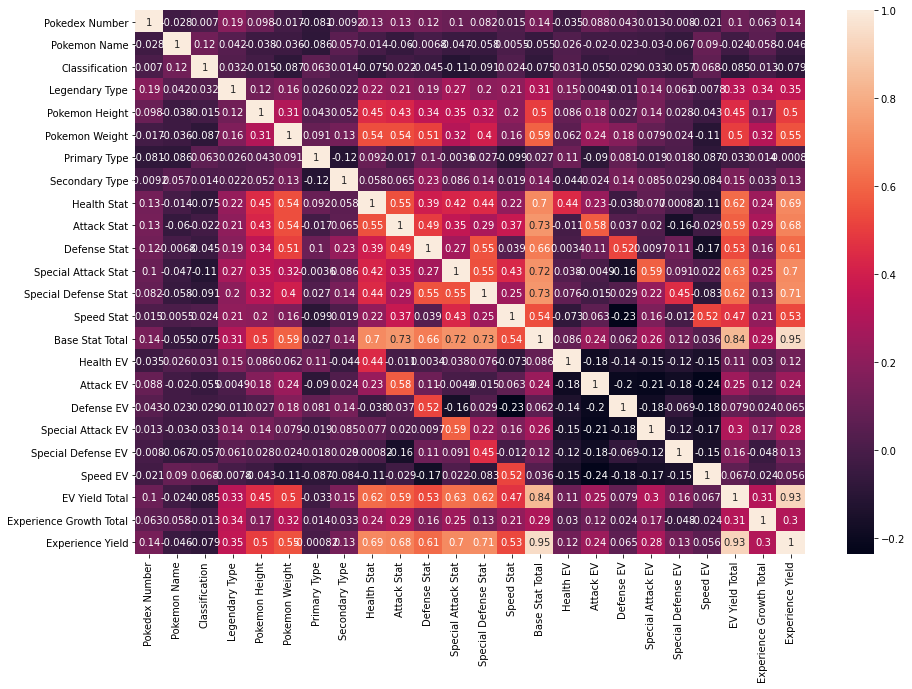

In [159]:
corrMatrix = df_pokemon.corr()
fig, ax = plt.subplots(figsize=(15,10))
sn.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

Now check this data out which shows battle results!

Now check out this site which has battle results!
https://www.kaggle.com/jonathanbouchet/pokemon-battles

## Combat Learning
Import the battle statistics and analyze for predictive analysis.
https://www.kaggle.com/terminus7/pokemon-challenge?select=combats.csv

Read in the data from csv file obtained at the link above. 

_Note: 50,000 battles collected_

In [163]:
df_combats = pd.read_csv('data\combats.csv', encoding = "ISO-8859-1")
df_combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


As you can see, the data above references Pokemon by their number and has no other data. I will need to append each row with additional data relevant to the pokemon.
I would like to do the following tasks for this data:
 - Show distribution of types of Pokemon in battle data.
 - Show new correlation matrix to see which factors play in most to who wins.
 - Make new dataframe that replaces the two respective Pokemon which simpler values, like 0 and 1, then the winner will be one of the two values. Of course, I will have to import relevant data before losing identity of the two such as their names, maybe numbers, and then any highly correlated values.